In [142]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [143]:
df_ = pd.read_csv("/Users/hanbui/Desktop/analyst/ChungCu.csv", sep = ",")
df = df_.copy()

<h1>Tiền xử lí dữ liệu</h1>

In [144]:
df.head(5)

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia,USD,log_price
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Quận 7,Đã bàn giao,62.0,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,2.000000e+09,83333.0,11.330600
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Quận 7,Đã bàn giao,95.0,3.0,NaN,NaN,2.0,Chung cư,Đang chờ sổ,NaN,Nội thất cao cấp,NaN,NaN,Căn góc,5.300000e+09,220833.0,12.305162
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",Quận Bình Tân,Chưa bàn giao,75.0,2.0,2,5.0,2.0,Chung cư,Giấy tờ khác,17,NaN,Đông Nam,Đông Nam,NaN,2.580000e+09,107500.0,11.585246
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",Quận Tân Bình,Đã bàn giao,70.0,1.0,A,7.0,1.0,Chung cư,Đang chờ sổ,BPA - 0712,Nội thất cao cấp,Đông Nam,Tây Bắc,NaN,4.000000e+09,166667.0,12.023753
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",Quận 6,Đã bàn giao,83.0,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Tây Bắc,NaN,NaN,2.950000e+09,122917.0,11.719265


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24019 entries, 0 to 24018
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DiaChi            24019 non-null  object 
 1   Quan              24019 non-null  object 
 2   TinhTrangBDS      24017 non-null  object 
 3   DienTich          24019 non-null  float64
 4   Phongngu          24019 non-null  float64
 5   TenPhanKhu        6865 non-null   object 
 6   SoTang            6529 non-null   float64
 7   PhongTam          24019 non-null  float64
 8   Loai              24019 non-null  object 
 9   GiayTo            18286 non-null  object 
 10  MaCanHo           3281 non-null   object 
 11  TinhTrangNoiThat  12420 non-null  object 
 12  HuongCuaChinh     9167 non-null   object 
 13  HuongBanCong      8502 non-null   object 
 14  DacDiem           5431 non-null   object 
 15  Gia               24019 non-null  float64
 16  USD               24019 non-null  float6

In [146]:
df.head()

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia,USD,log_price
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Quận 7,Đã bàn giao,62.0,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,2.000000e+09,83333.0,11.330600
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Quận 7,Đã bàn giao,95.0,3.0,NaN,NaN,2.0,Chung cư,Đang chờ sổ,NaN,Nội thất cao cấp,NaN,NaN,Căn góc,5.300000e+09,220833.0,12.305162
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",Quận Bình Tân,Chưa bàn giao,75.0,2.0,2,5.0,2.0,Chung cư,Giấy tờ khác,17,NaN,Đông Nam,Đông Nam,NaN,2.580000e+09,107500.0,11.585246
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",Quận Tân Bình,Đã bàn giao,70.0,1.0,A,7.0,1.0,Chung cư,Đang chờ sổ,BPA - 0712,Nội thất cao cấp,Đông Nam,Tây Bắc,NaN,4.000000e+09,166667.0,12.023753
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",Quận 6,Đã bàn giao,83.0,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Tây Bắc,NaN,NaN,2.950000e+09,122917.0,11.719265


In [147]:
document = df['GiayTo'].value_counts()
document.head(30)

GiayTo
Đã có sổ        8330
Đang chờ sổ     7979
Giấy tờ khác    1977
Name: count, dtype: int64

<span>Chuyển các data chữ thành data số: Hướng cửa chính, Hướng ban công, Giấy tờ</span>

In [148]:
main_direction = df['HuongCuaChinh'].value_counts()
side_direction = df['HuongBanCong'].value_counts()
main_direction.head(30)

HuongCuaChinh
Đông Nam    1963
Tây Bắc     1572
Nam         1562
Đông Bắc    1252
Đông         916
Tây Nam      789
Tây          578
Bắc          535
Name: count, dtype: int64

In [149]:
estate = df['TinhTrangBDS'].value_counts()
estate.head(5)

TinhTrangBDS
Đã bàn giao      18669
Chưa bàn giao     5348
Name: count, dtype: int64

In [150]:
interior = df['TinhTrangNoiThat'].value_counts()
interior.head(10)

TinhTrangNoiThat
Hoàn thiện cơ bản    4506
Nội thất cao cấp     4184
Nội thất đầy đủ      3490
Bàn giao thô          240
Name: count, dtype: int64

In [151]:
type_ = df['Loai'].value_counts()
type_.head(10)

Loai
Chung cư                 22173
 Căn hộ dịch vụ, mini      727
Officetel                  391
Penthouse                  367
Duplex                     301
 Tập thể, cư xá             60
Name: count, dtype: int64

In [152]:
side_direction.head(20)

HuongBanCong
Đông Nam    1939
Tây Nam     1118
Tây Bắc     1092
Đông Bắc    1046
Đông         982
Bắc          935
Tây          712
Nam          678
Name: count, dtype: int64

<h1>Có 8 hướng đổi thành 8 số</h1>
<h2>Đông = 1</h2>
<h2>Tây = 2</h2>
<h2>Nam = 3</h2>
<h2>Bắc = 4</h2>
<h2>Đông Nam = 5</h2>
<h2>Tây Nam = 6</h2>
<h2>Tây Bắc = 7</h2>
<h2>Đông Bắc = 8</h2>

<h1>Chuyển hướng nhà thành số</h1>

In [153]:

import pandas as pd

# tạo một từ điển mã hoá thủ công
mapping = {'Đông': 1, 'Tây': 2, 'Nam': 3, 'Bắc': 4, 'Đông Nam': 5, 'Tây Nam': 6, 'Tây Bắc': 7, 'Đông Bắc': 8}

# Mã hoá hướng
df['HuongCuaChinh_ma_hoa'] = df['HuongCuaChinh'].map(mapping)
df['HuongBanCong_ma_hoa'] = df['HuongBanCong'].map(mapping)

# Mã hoá giấy tờ
doc = {'Đã có sổ': 1, 'Đang chờ sổ': 2, 'Giấy tờ khác': 3}
df['GiayTo_ma_hoa'] = df['GiayTo'].map(doc)

# Mã hoá Tình trạng BDS
BDS = {'Đã bàn giao': 1, 'Chưa bàn giao': 0}
df['TinhTrangBDS_encoded'] = df['TinhTrangBDS'].map(BDS)

# Mã hoá tình trạng nội thất
ND = {'Hoàn thiện cơ bản': 1, 'Nội thất đầy đủ': 2, 'Nội thất cao cấp':3,'Bàn giao thô': 4}
df['TinhTrangNoiThat_encoded'] = df['TinhTrangNoiThat'].map(ND)

# mã hoá loại chung cư
TYPE = {'Chung cư': 1, ' Căn hộ dịch vụ, mini': 2, 'Officetel': 3, 'Duplex':4, 'Penthouse':5, ' Tập thể, cư xá': 6}
df['Loai_encoded'] = df['Loai'].map(TYPE)


df.head()

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,...,DacDiem,Gia,USD,log_price,HuongCuaChinh_ma_hoa,HuongBanCong_ma_hoa,GiayTo_ma_hoa,TinhTrangBDS_encoded,TinhTrangNoiThat_encoded,Loai_encoded
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Quận 7,Đã bàn giao,62.0,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,...,NaN,2.000000e+09,83333.0,11.330600,NaN,NaN,1.0,1.0,NaN,1
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Quận 7,Đã bàn giao,95.0,3.0,NaN,NaN,2.0,Chung cư,Đang chờ sổ,...,Căn góc,5.300000e+09,220833.0,12.305162,NaN,NaN,2.0,1.0,3.0,1
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",Quận Bình Tân,Chưa bàn giao,75.0,2.0,2,5.0,2.0,Chung cư,Giấy tờ khác,...,NaN,2.580000e+09,107500.0,11.585246,5.0,5.0,3.0,0.0,NaN,1
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",Quận Tân Bình,Đã bàn giao,70.0,1.0,A,7.0,1.0,Chung cư,Đang chờ sổ,...,NaN,4.000000e+09,166667.0,12.023753,5.0,7.0,2.0,1.0,3.0,1
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",Quận 6,Đã bàn giao,83.0,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,...,NaN,2.950000e+09,122917.0,11.719265,7.0,NaN,1.0,1.0,3.0,1


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24019 entries, 0 to 24018
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DiaChi                    24019 non-null  object 
 1   Quan                      24019 non-null  object 
 2   TinhTrangBDS              24017 non-null  object 
 3   DienTich                  24019 non-null  float64
 4   Phongngu                  24019 non-null  float64
 5   TenPhanKhu                6865 non-null   object 
 6   SoTang                    6529 non-null   float64
 7   PhongTam                  24019 non-null  float64
 8   Loai                      24019 non-null  object 
 9   GiayTo                    18286 non-null  object 
 10  MaCanHo                   3281 non-null   object 
 11  TinhTrangNoiThat          12420 non-null  object 
 12  HuongCuaChinh             9167 non-null   object 
 13  HuongBanCong              8502 non-null   object 
 14  DacDie

In [155]:
print(df.shape)

(24019, 24)


In [156]:
print(df.dtypes)

DiaChi                       object
Quan                         object
TinhTrangBDS                 object
DienTich                    float64
Phongngu                    float64
TenPhanKhu                   object
SoTang                      float64
PhongTam                    float64
Loai                         object
GiayTo                       object
MaCanHo                      object
TinhTrangNoiThat             object
HuongCuaChinh                object
HuongBanCong                 object
DacDiem                      object
Gia                         float64
USD                         float64
log_price                   float64
HuongCuaChinh_ma_hoa        float64
HuongBanCong_ma_hoa         float64
GiayTo_ma_hoa               float64
TinhTrangBDS_encoded        float64
TinhTrangNoiThat_encoded    float64
Loai_encoded                  int64
dtype: object


In [157]:
print(df.isnull().sum())

DiaChi                          0
Quan                            0
TinhTrangBDS                    2
DienTich                        0
Phongngu                        0
TenPhanKhu                  17154
SoTang                      17490
PhongTam                        0
Loai                            0
GiayTo                       5733
MaCanHo                     20738
TinhTrangNoiThat            11599
HuongCuaChinh               14852
HuongBanCong                15517
DacDiem                     18588
Gia                             0
USD                             0
log_price                       0
HuongCuaChinh_ma_hoa        14852
HuongBanCong_ma_hoa         15517
GiayTo_ma_hoa                5733
TinhTrangBDS_encoded            2
TinhTrangNoiThat_encoded    11599
Loai_encoded                    0
dtype: int64


In [158]:
df[df.duplicated]

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,...,DacDiem,Gia,USD,log_price,HuongCuaChinh_ma_hoa,HuongBanCong_ma_hoa,GiayTo_ma_hoa,TinhTrangBDS_encoded,TinhTrangNoiThat_encoded,Loai_encoded
25,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",Quận 6,Đã bàn giao,83.0,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,...,NaN,2.950000e+09,122917.0,11.719265,7.0,NaN,1.0,1.0,3.0,1
29,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Quận 7,Đã bàn giao,95.0,3.0,NaN,NaN,2.0,Chung cư,Đang chờ sổ,...,Căn góc,5.300000e+09,220833.0,12.305162,NaN,NaN,2.0,1.0,3.0,1
50,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",Quận 6,Đã bàn giao,83.0,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,...,NaN,2.950000e+09,122917.0,11.719265,7.0,NaN,1.0,1.0,3.0,1
52,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Quận 7,Đã bàn giao,62.0,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,...,NaN,2.000000e+09,83333.0,11.330600,NaN,NaN,1.0,1.0,NaN,1
73,"Đường Nguyễn Văn Linh, Phường 6, Quận 8, Tp Hồ...",Quận 8,Đã bàn giao,65.0,2.0,NaN,NaN,1.0,Chung cư,NaN,...,NaN,1.800000e+09,75000.0,11.225243,NaN,1.0,NaN,1.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23997,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Quận 9,Đã bàn giao,53.0,2.0,NaN,NaN,1.0,Chung cư,Đã có sổ,...,NaN,1.500000e+09,62500.0,11.042922,NaN,NaN,1.0,1.0,NaN,1
23998,"Đường Huỳnh Tấn Phát, Xã Phú Xuân, Huyện Nhà B...",Huyện Nhà Bè,Đã bàn giao,61.0,2.0,B,NaN,2.0,Chung cư,Đang chờ sổ,...,NaN,1.090000e+09,45417.0,10.723642,6.0,8.0,2.0,1.0,2.0,1
23999,"Hạu Giang, Phường 11, Quận 6, Tp Hồ Chí Minh",Quận 6,Đã bàn giao,97.0,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,...,Căn góc,3.550000e+09,147917.0,11.904407,8.0,6.0,1.0,1.0,1.0,1
24000,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",Quận Bình Tân,Chưa bàn giao,75.0,2.0,2,5.0,2.0,Chung cư,Giấy tờ khác,...,NaN,2.580000e+09,107500.0,11.585246,5.0,5.0,3.0,0.0,NaN,1


In [159]:
df = df.drop_duplicates(keep='first')

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18233 entries, 0 to 24018
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DiaChi                    18233 non-null  object 
 1   Quan                      18233 non-null  object 
 2   TinhTrangBDS              18231 non-null  object 
 3   DienTich                  18233 non-null  float64
 4   Phongngu                  18233 non-null  float64
 5   TenPhanKhu                5195 non-null   object 
 6   SoTang                    5125 non-null   float64
 7   PhongTam                  18233 non-null  float64
 8   Loai                      18233 non-null  object 
 9   GiayTo                    13510 non-null  object 
 10  MaCanHo                   2230 non-null   object 
 11  TinhTrangNoiThat          9129 non-null   object 
 12  HuongCuaChinh             6234 non-null   object 
 13  HuongBanCong              5852 non-null   object 
 14  DacDiem    

In [161]:
import numpy as np
print(np.shape(df))

(18233, 24)


In [162]:
# chọn các giá trị float64
float_columns = df.select_dtypes(include=['float64'])

#in các giá trị thống kê
statistics = float_columns.describe(percentiles=[0.25,0.5,0.7])
print(statistics)

           DienTich      Phongngu       SoTang      PhongTam           Gia  \
count  18233.000000  18233.000000  5125.000000  18233.000000  1.823300e+04   
mean      70.875656      2.034114    11.349268      1.730818  2.791747e+09   
std       31.194864      0.793470     7.657465      0.644314  8.864671e+09   
min        1.000000      1.000000     1.000000      1.000000  1.000000e+06   
25%       55.000000      2.000000     5.000000      1.000000  1.600000e+09   
50%       67.000000      2.000000    10.000000      2.000000  2.200000e+09   
70%       75.000000      2.000000    15.000000      2.000000  2.900000e+09   
max      500.000000     11.000000    70.000000      7.000000  9.800000e+11   

                USD     log_price  HuongCuaChinh_ma_hoa  HuongBanCong_ma_hoa  \
count  1.823300e+04  18233.000000           6234.000000          5852.000000   
mean   1.163228e+05     11.287776              4.713025             4.762303   
std    3.693613e+05      1.086417              2.252389  

<span>Sau khi clean dữ liệu</span>

<h1>Trực quan hoá </h1>

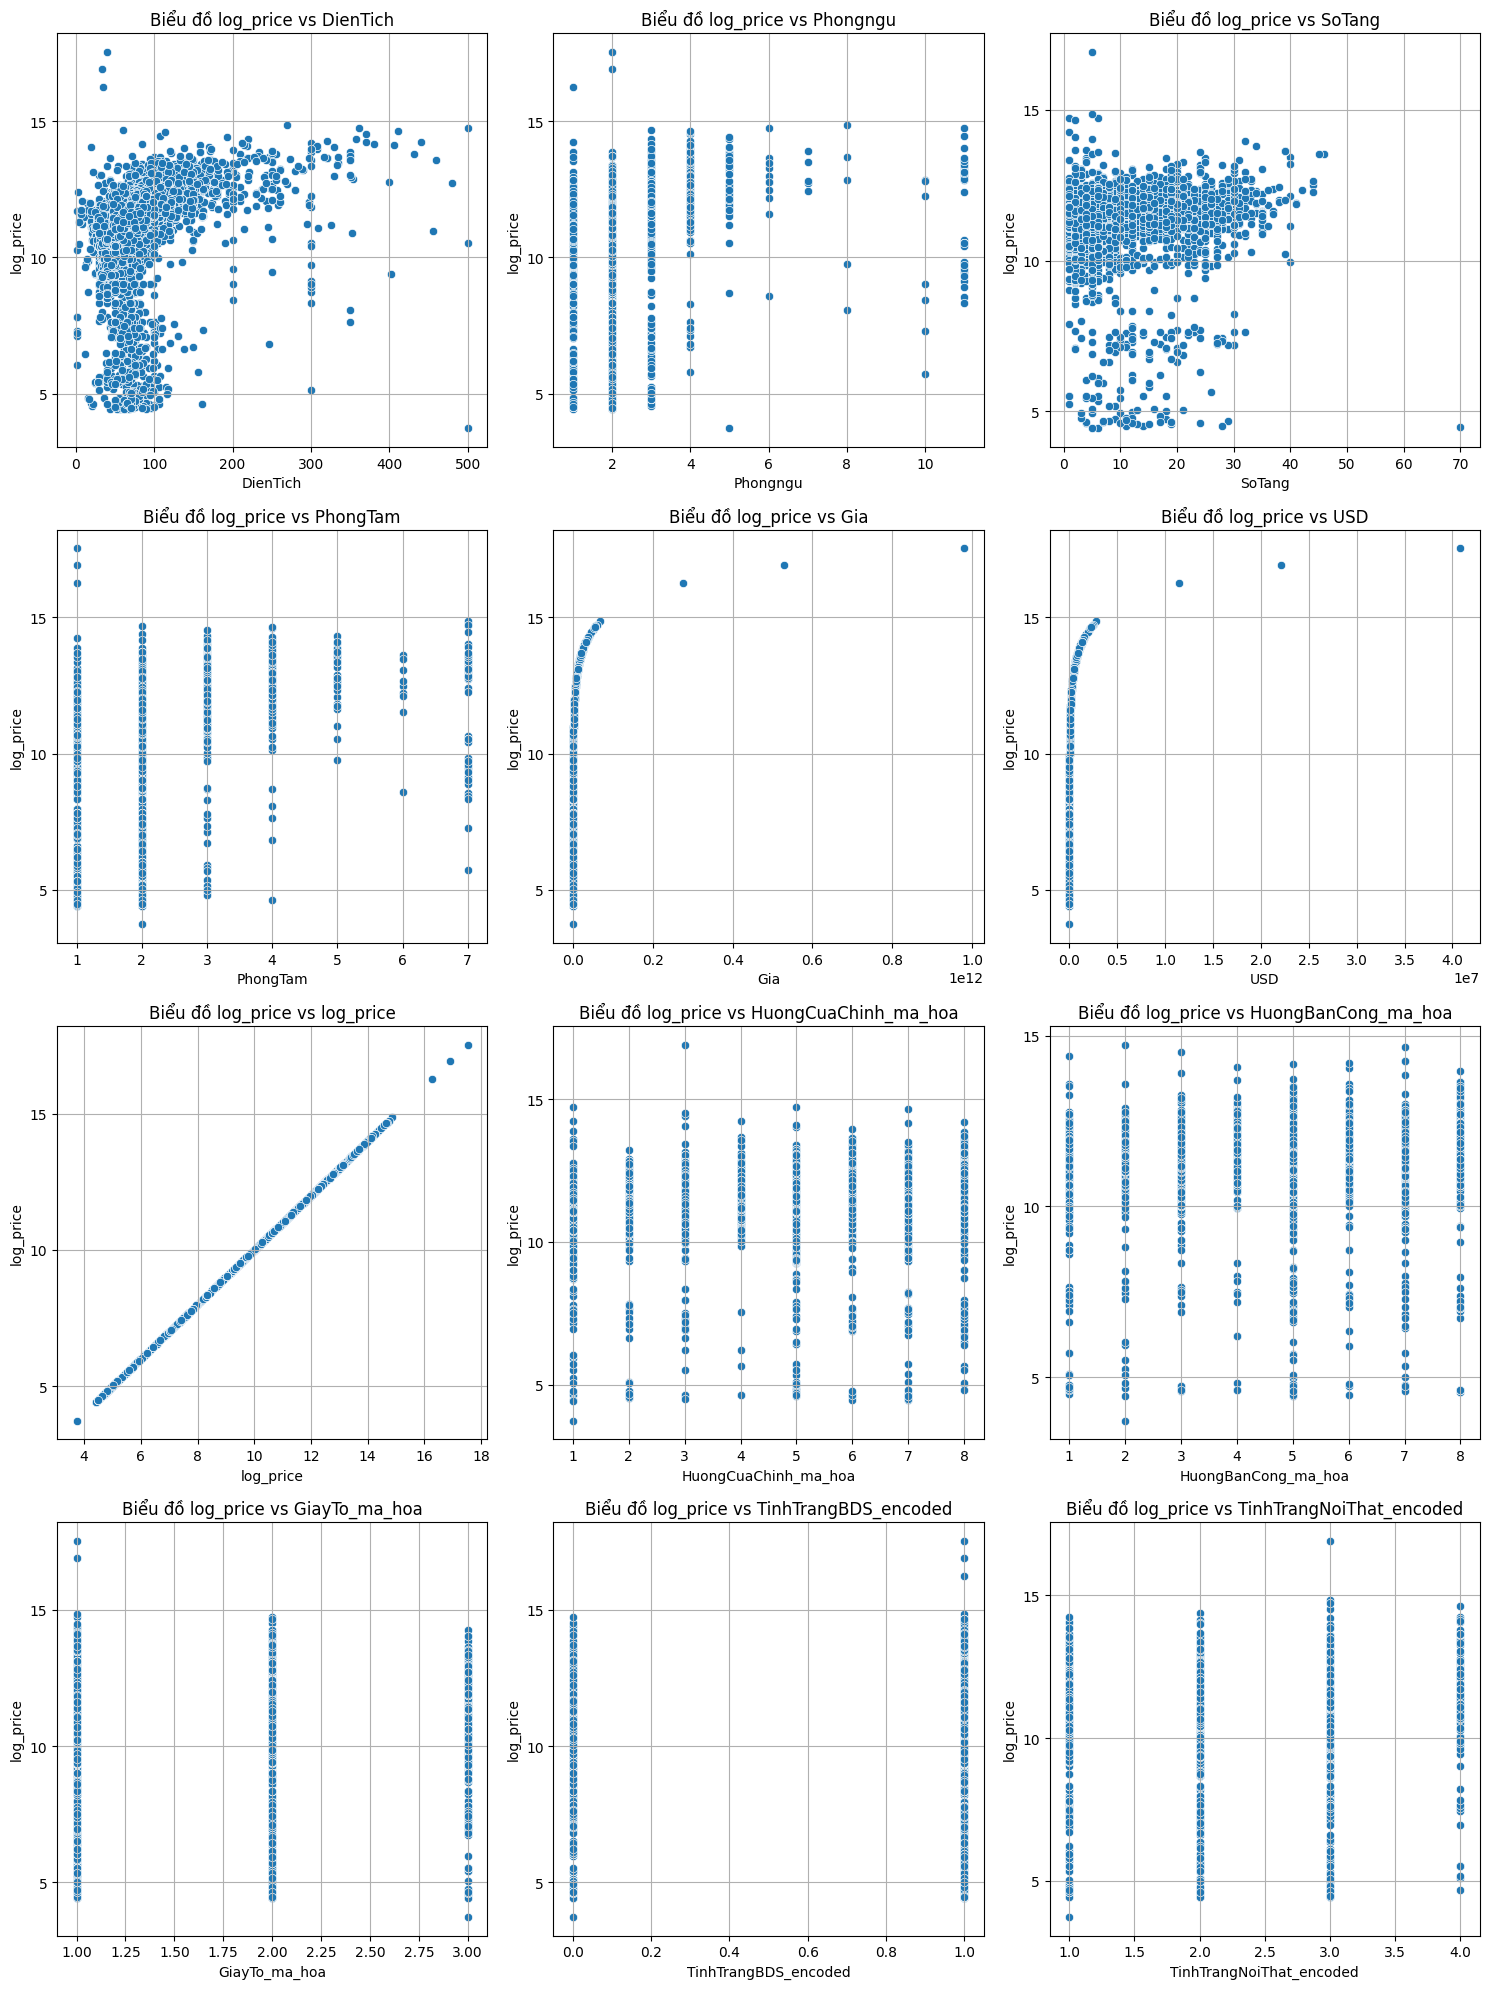

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = 3  # Số cột bạn muốn trong lưới subplot
num_rows = (len(float_columns.columns) + num_cols - 1) // num_cols  # Tính số hàng cần thiết
fig, axs = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(15, 5*num_rows))

axs = axs.flatten()
for i, column in enumerate(float_columns.columns):
    sns.scatterplot(x=column, y='log_price', data=df, ax=axs[i])
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('log_price')
    axs[i].set_title(f'Biểu đồ log_price vs {column}')
    axs[i].set_yticks([5, 10, 15])  # Đặt các bước nhảy cho trục y
    axs[i].grid(True)

# Loại bỏ các trục dư thừa (nếu có)
for i in range(len(float_columns.columns), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

<span>Ta thấy các biến ảnh hưởng nhiều tới giá chỉ có Diện tích và Số Tầng</span>

In [164]:
district = df['Quan'].value_counts()
district.head(50)

Quan
 Quận 9              2207
 Quận 7              1990
 Quận Thủ Đức        1523
 Quận 2              1496
 Quận 8              1492
 Quận Bình Tân       1488
 Quận Tân Phú        1287
 Quận Bình Thạnh      922
 Huyện Nhà Bè         878
 Quận 12              829
 Quận Tân Bình        616
 Huyện Bình Chánh     590
 Quận Phú Nhuận       457
 Quận Gò Vấp          438
 Quận 4               398
 Quận 6               367
 Huyện Hóc Môn        336
 Quận 10              319
 Quận 5               212
 Quận 1               173
 Quận 3               106
 Quận 11               97
 Huyện Củ Chi          12
Name: count, dtype: int64

<span>Tính tương quan của quận và giá</span>

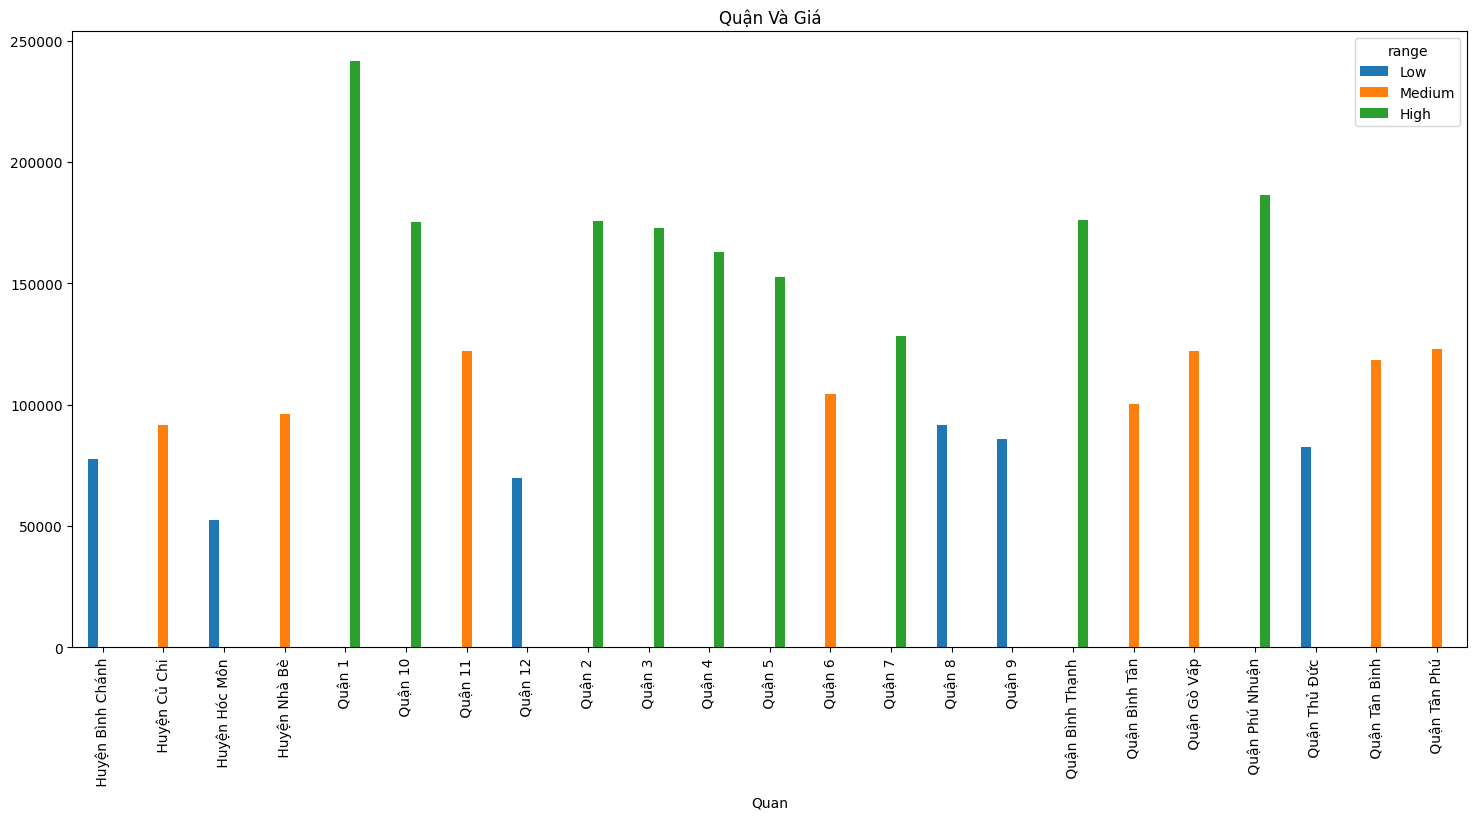

In [236]:
frame1 = df[['Quan','TinhTrangBDS','TinhTrangBDS_encoded','TenPhanKhu','Loai','Loai_encoded','GiayTo','GiayTo_ma_hoa','MaCanHo','TinhTrangNoiThat','TinhTrangNoiThat_encoded','HuongCuaChinh','HuongCuaChinh_ma_hoa','HuongBanCong_ma_hoa','HuongBanCong'
                ,'DacDiem','Gia','USD']]

table = frame1.groupby(['Quan'])['USD'].mean().reset_index()
# Gộp bảng tính giá trị trung bình vào 'frame1'
frame1 = frame1.merge(table, how='left', on='Quan', suffixes=('', '_mean'))

# Chỉ định nhãn cho 3 nhóm 'Low', 'Medium', 'High'
labels = ['Low', 'Medium', 'High']

# Tạo các nhóm giá trị USD với qcut
num_bins = 3  # Số lượng nhóm bạn muốn chia
frame1['range'] = pd.qcut(frame1['USD_mean'], q=num_bins, labels=labels, duplicates='drop')

# Thiết lập kích thước hình vẽ
plt.rcParams['figure.figsize'] = (18, 8)

# Tạo DataFrame để vẽ biểu đồ
df_plot = frame1.groupby(['Quan', 'range'], observed=False)['USD'].mean().unstack(fill_value=0)
df_plot.plot(kind='bar')

# Thiết lập tiêu đề cho biểu đồ
plt.title('Quận Và Giá')
plt.show()

<span>Dựa vào biểu đồ ta thấy, giá nhà ở quận 1, Phú Nhuận đạt mức khá cao so với các khu vực khác và giá nhà ở Hóc Môn và Quận 12 thì thấp </span>

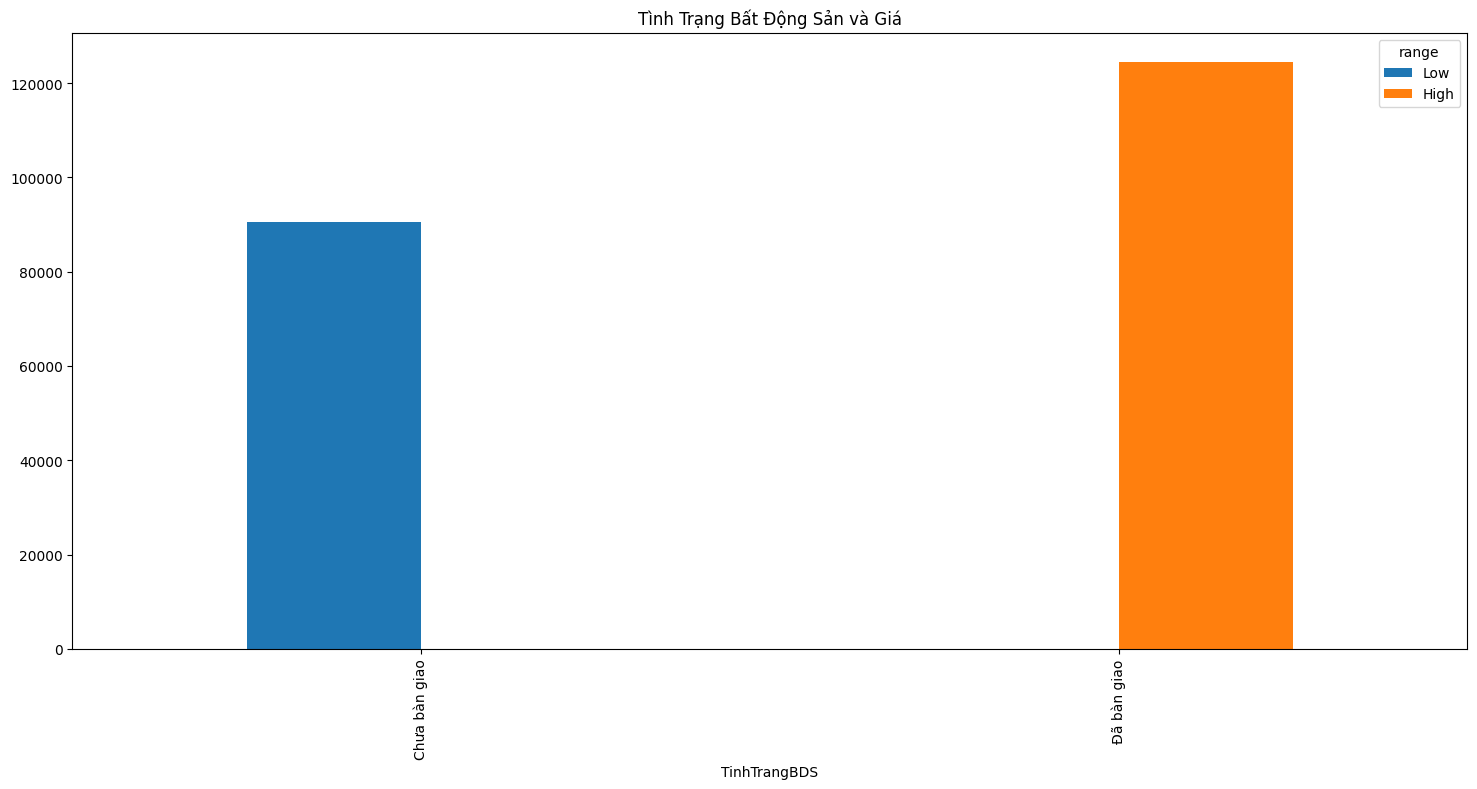

In [235]:
# Giả sử 'df' là DataFrame ban đầu của bạn
frame1 = df[['Quan','TinhTrangBDS','TenPhanKhu','Loai','GiayTo','MaCanHo','TinhTrangNoiThat','HuongCuaChinh','HuongBanCong','DacDiem','Gia','USD']]

# Tính giá trị trung bình của USD theo nhóm trong cột 'TinhTrangBDS'
col = 'TinhTrangBDS'
table = frame1.groupby([col])['USD'].mean().reset_index()
# Gộp bảng tính giá trị trung bình vào 'frame1'
frame1 = frame1.merge(table, how='left', on=col, suffixes=('', '_mean'))

# Chỉ định nhãn cho 2 nhóm 'Low' và 'High'
labels = ['Low', 'High']

# Chuyển đổi Series thành mảng NumPy một chiều và áp dụng pd.cut
frame1['range'] = pd.cut(frame1['USD_mean'].to_numpy(), bins=2, labels=labels)

# Thiết lập kích thước hình vẽ
plt.rcParams['figure.figsize'] = (18, 8)

# Tạo DataFrame để vẽ biểu đồ
df_plot = frame1.groupby([col, 'range'], observed=False)['USD'].mean().unstack(fill_value=0)
df_plot.plot(kind='bar')

# Thiết lập tiêu đề cho biểu đồ
plt.title('Tình Trạng Bất Động Sản và Giá')
plt.show()


<span>Những chung cư được bàn giao có giá cao hơn chung cư chưa được bàn giao</span>

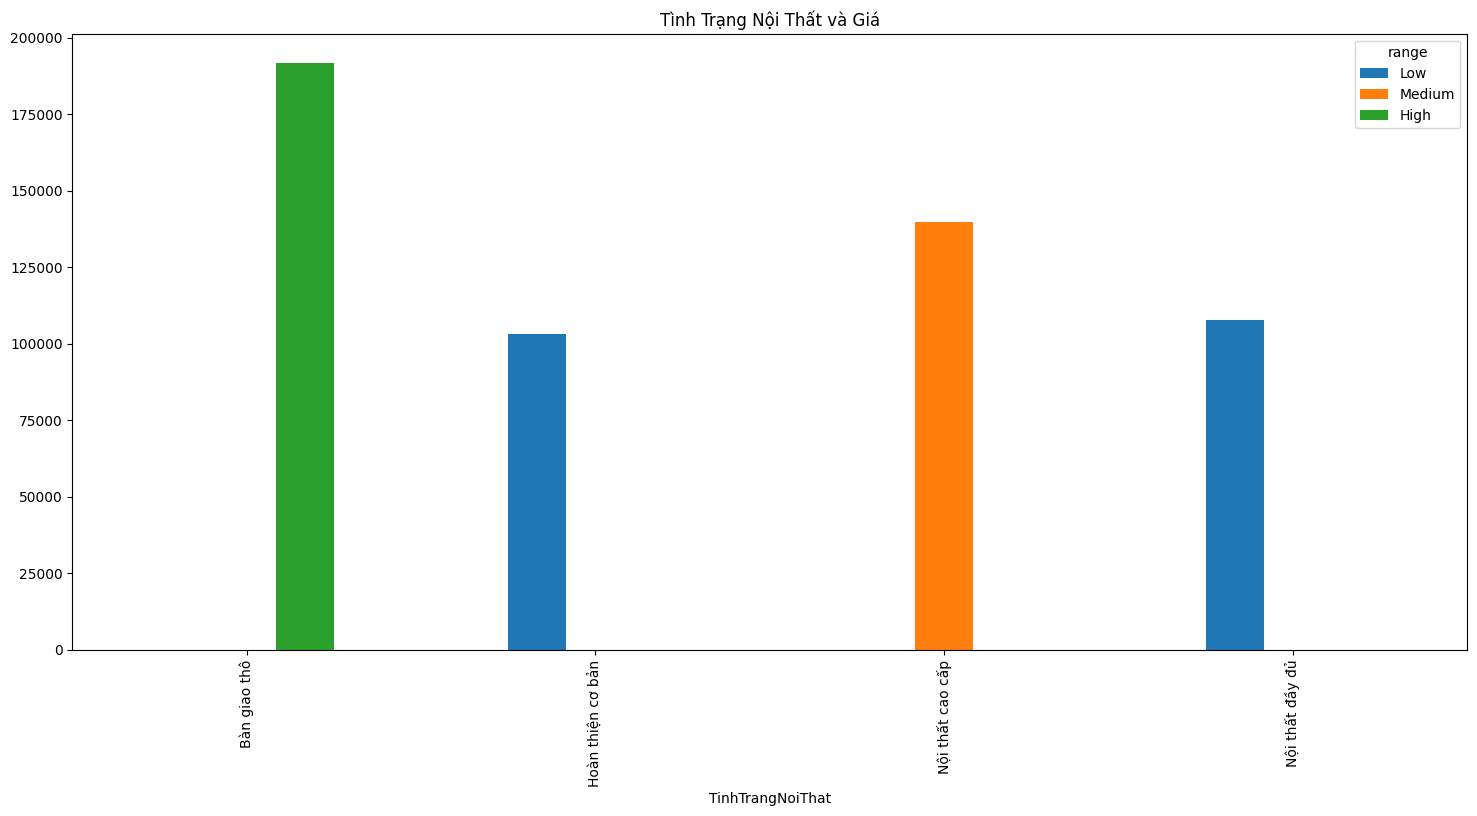

In [238]:


# Giả sử 'df' là DataFrame ban đầu của bạn
frame1 = df[['Quan','TinhTrangBDS','TenPhanKhu','Loai','GiayTo','MaCanHo','TinhTrangNoiThat','HuongCuaChinh','HuongBanCong','DacDiem','Gia','USD']]

# Tính giá trị trung bình của USD theo nhóm trong cột 'TinhTrangBDS'
col = 'TinhTrangNoiThat'
table = frame1.groupby([col])['USD'].mean().reset_index()
# Gộp bảng tính giá trị trung bình vào 'frame1'
frame1 = frame1.merge(table, how='left', on=col, suffixes=('', '_mean'))

# Chỉ định nhãn cho 2 nhóm 'Low' và 'High'
labels = ['Low', 'Medium','High']

# Chuyển đổi Series thành mảng NumPy một chiều và áp dụng pd.cut
frame1['range'] = pd.cut(frame1['USD_mean'].to_numpy(), bins=3, labels=labels)

# Thiết lập kích thước hình vẽ
plt.rcParams['figure.figsize'] = (18, 8)

# Tạo DataFrame để vẽ biểu đồ
df_plot = frame1.groupby([col, 'range'], observed=False)['USD'].mean().unstack(fill_value=0)
df_plot.plot(kind='bar')

# Thiết lập tiêu đề cho biểu đồ
plt.title('Tình Trạng Nội Thất và Giá')
plt.show()


<span>Nội thất bàn giao thô được nhiều người ưu chuộng trong những khu căn hộ có giá cao</span>

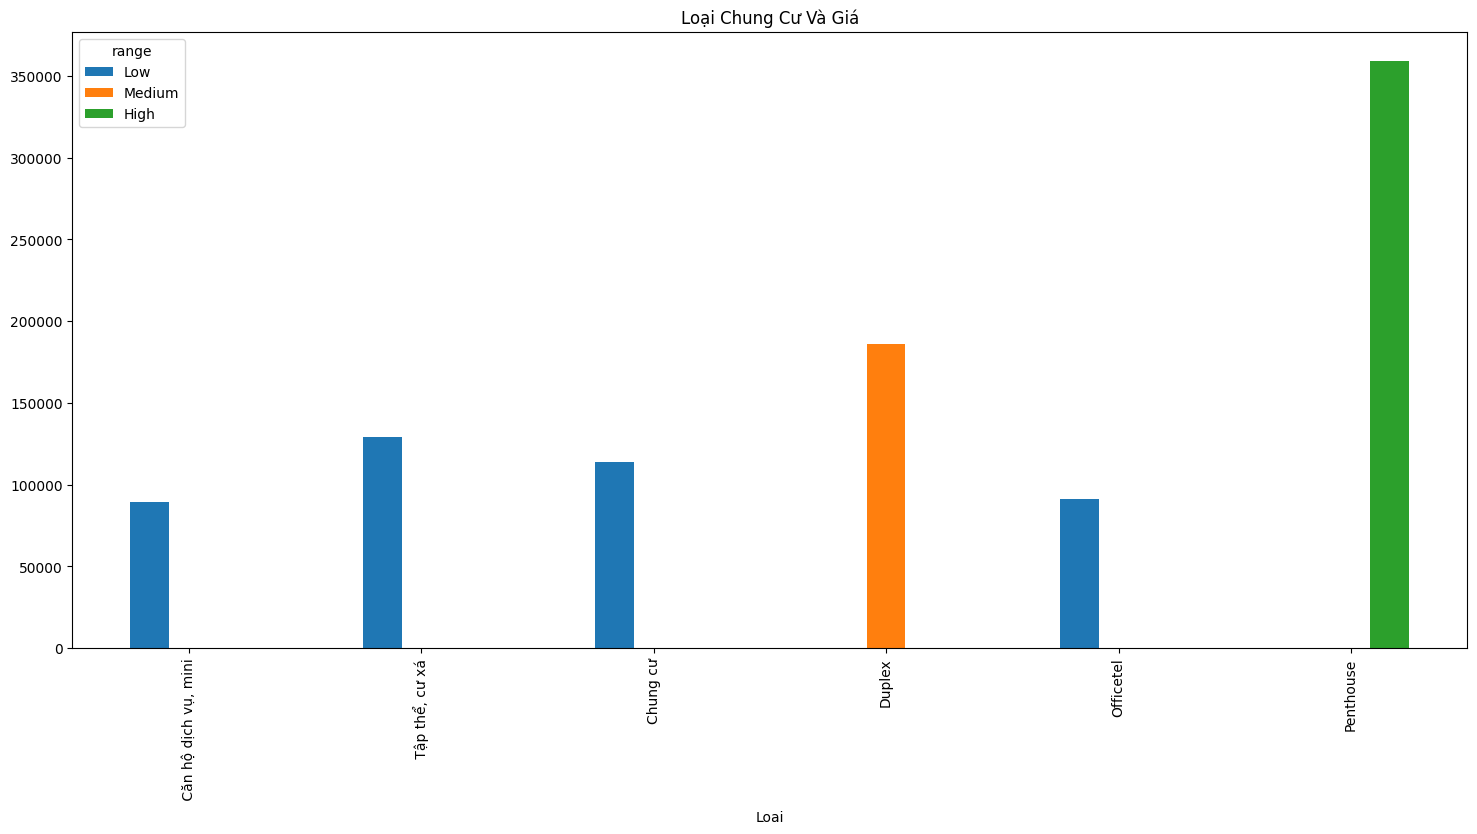

In [240]:


# Giả sử 'df' là DataFrame ban đầu của bạn
frame1 = df[['Quan','TinhTrangBDS','TenPhanKhu','Loai','GiayTo','MaCanHo','TinhTrangNoiThat','HuongCuaChinh','HuongBanCong','DacDiem','Gia','USD']]

# Tính giá trị trung bình của USD theo nhóm trong cột 'TinhTrangBDS'
col = 'Loai'
table = frame1.groupby([col])['USD'].mean().reset_index()
# Gộp bảng tính giá trị trung bình vào 'frame1'
frame1 = frame1.merge(table, how='left', on=col, suffixes=('', '_mean'))

# Chỉ định nhãn cho 2 nhóm 'Low' và 'High'
labels = ['Low', 'Medium','High']

# Chuyển đổi Series thành mảng NumPy một chiều và áp dụng pd.cut
frame1['range'] = pd.cut(frame1['USD_mean'].to_numpy(), bins=3, labels=labels)

# Thiết lập kích thước hình vẽ
plt.rcParams['figure.figsize'] = (18, 8)

# Tạo DataFrame để vẽ biểu đồ
df_plot = frame1.groupby([col, 'range'], observed=False)['USD'].mean().unstack(fill_value=0)
df_plot.plot(kind='bar')

# Thiết lập tiêu đề cho biểu đồ
plt.title('Loại Chung Cư Và Giá')
plt.show()


<span>Penhouse có giá từ trung bình đến cao</span>

In [241]:
test = frame1[frame1.USD <frame1.USD.quantile(0.8)]

HuongBanCong
Đông Nam    1113
Tây Bắc      602
Đông         559
Nam          554
Đông Bắc     538
Tây Nam      446
Bắc          374
Tây          349
Name: count, dtype: int64


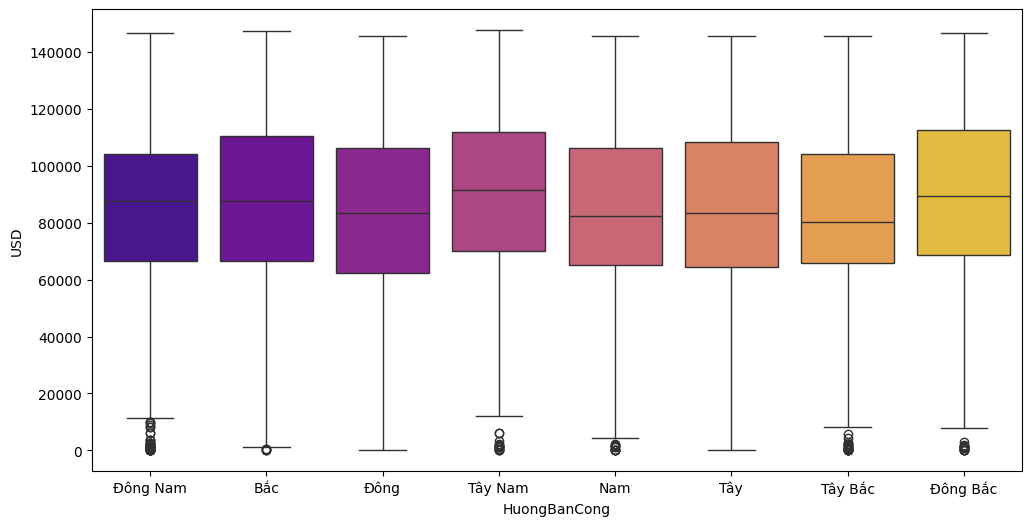

HuongCuaChinh
Đông Nam    1051
Tây Bắc      749
Đông         623
Đông Bắc     574
Nam          532
Tây          476
Tây Nam      439
Bắc          419
Name: count, dtype: int64


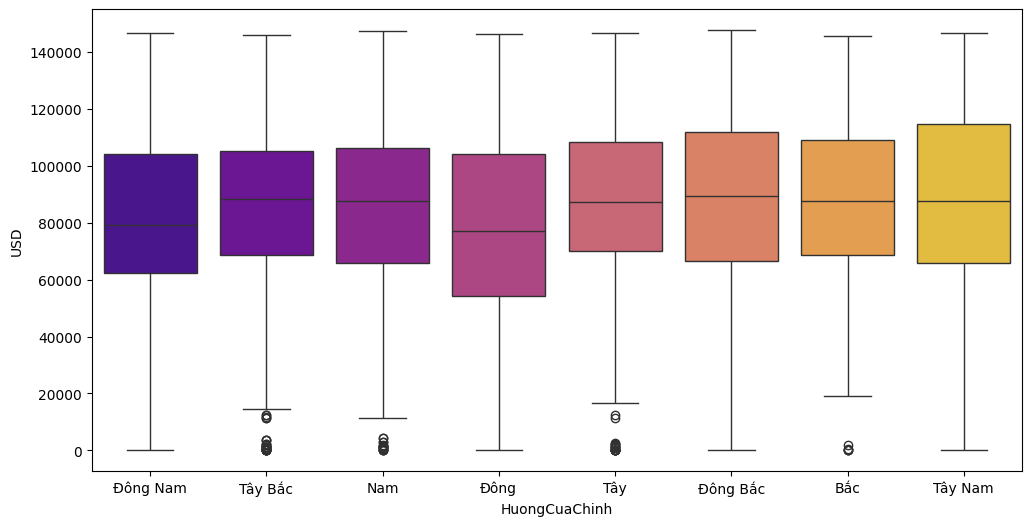

Loai
Chung cư                 13326
 Căn hộ dịch vụ, mini      601
Officetel                  351
Duplex                     187
Penthouse                   66
 Tập thể, cư xá             47
Name: count, dtype: int64


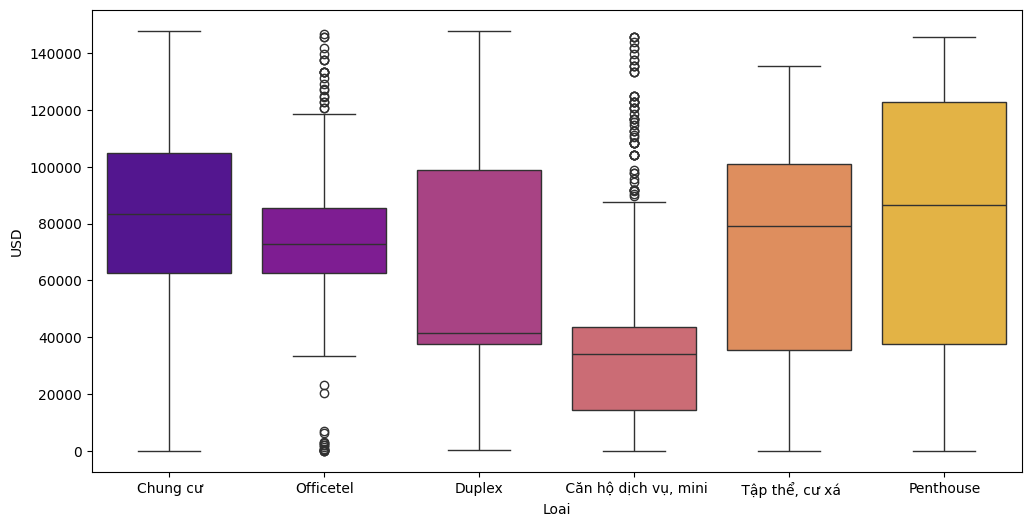

GiayTo
Đã có sổ        4968
Đang chờ sổ     4671
Giấy tờ khác    1199
Name: count, dtype: int64


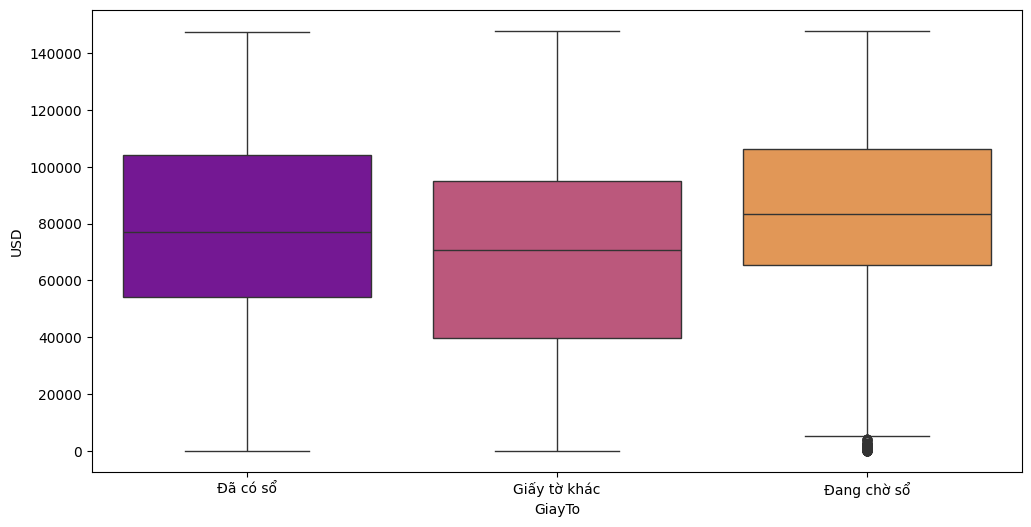

In [245]:
plt.rcParams['figure.figsize'] = (12, 6)

print(test.HuongBanCong.value_counts())
# Đặt x = HuongBanCong làm hue và legend=False để sử dụng palette
sns.boxplot(x=test.HuongBanCong, y=test.USD, hue=test.HuongBanCong, palette="plasma", legend=False)

# Đặt nhãn cho trục x và y
plt.xlabel('HuongBanCong')
plt.ylabel('USD')

# Hiển thị biểu đồ
plt.show()

print(test.HuongCuaChinh.value_counts())
# Đặt x = HuongCuaChinh làm hue và legend=False để sử dụng palette
sns.boxplot(x=test.HuongCuaChinh, y=test.USD, hue=test.HuongCuaChinh, palette="plasma", legend=False)

# Đặt nhãn cho trục x và y
plt.xlabel('HuongCuaChinh')
plt.ylabel('USD')

# Hiển thị biểu đồ
plt.show()

print(test.Loai.value_counts())
# Đặt x = Loai làm hue và legend=False để sử dụng palette
sns.boxplot(x=test.Loai, y=test.USD, hue=test.Loai, palette="plasma", legend=False)

# Đặt nhãn cho trục x và y
plt.xlabel('Loai')
plt.ylabel('USD')

# Hiển thị biểu đồ
plt.show()

print(test.GiayTo.value_counts())
# Đặt x = GiayTo làm hue và legend=False để sử dụng palette
sns.boxplot(x=test.GiayTo, y=test.USD, hue=test.GiayTo, palette="plasma", legend=False)

# Đặt nhãn cho trục x và y
plt.xlabel('GiayTo')
plt.ylabel('USD')

# Hiển thị biểu đồ
plt.show()